# 1. Первичная обработка данных

Ипортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import cufflinks as cf
import numpy as np
%matplotlib inline


pd.set_option('display.max_rows', 400)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.xls')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

По целевому показателю score есть пропущенные значения. Уберем эти данные из анализа:

In [3]:
students = students.loc[students.score <= 100]

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

In [5]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Для удобства использования pandas переименуем некторые столбцы, а также разобъем их по типу.

In [6]:
students.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
                    'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
                    'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
                    'studytime, granular', 'higher', 'internet', 'romantic', 'fam_rel',
                    'free_time', 'go_out', 'health', 'absences', 'score']

In [7]:
students.columns.to_series().groupby(students.dtypes).groups

{dtype('int64'): Index(['age'], dtype='object'),
 dtype('float64'): Index(['m_edu', 'f_edu', 'travel_time', 'study_time', 'failures',
        'studytime, granular', 'fam_rel', 'free_time', 'go_out', 'health',
        'absences', 'score'],
       dtype='object'),
 dtype('O'): Index(['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job',
        'reason', 'guardian', 'school_sup', 'fam_sup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic'],
       dtype='object')}

In [8]:
numeric_columns = ['m_edu', 'f_edu', 'travel_time', 'study_time', 'failures', 'fam_rel',
                   'free_time', 'go_out', 'health', 'absences', 'score', 'age', 'studytime, granular']

nominative_columns = ['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job',
                      'reason', 'guardian', 'school_sup', 'fam_sup', 'paid', 'activities',
                      'nursery', 'higher', 'internet', 'romantic']

In [9]:
def get_boxplot(column):
    '''

    Формирование боксплотов по переданным переменным

    '''
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x='score', y=column,
                data=students,
                )
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [10]:
def get_stat_dif(column):
    '''

    Тест Стьюдента

    '''

    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# 2. Распределение признака для числовых переменных. Устранение выбросов

In [11]:
pd.Series(numeric_columns, range(1, 14))

1                   m_edu
2                   f_edu
3             travel_time
4              study_time
5                failures
6                 fam_rel
7               free_time
8                  go_out
9                  health
10               absences
11                  score
12                    age
13    studytime, granular
dtype: object

В представленной выборке 13 числовых переменных.

## Вариант 1. Поочередный разбор

### 1.  m_edu, f_edu (1,2)
Согласно описанию переменных их распределение находится в границах от 0 до 4.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000245CF738FA0>,
      dtype=object)

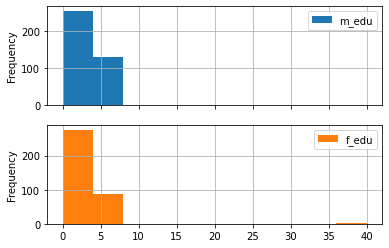

In [12]:
students[['m_edu', 'f_edu']].plot(kind='hist',
                                  grid=True,
                                  subplots=True)

По гистограммам видим, что в переменной Феду есть некорректно указанное значение. Избавимся от него:

In [13]:
students.f_edu = students.f_edu.apply(lambda x: None if x > 4 else x)

### 2. travel_time, study_time (3 и 4 показатель)
Согласно описанию переменных их распределение находится в границах от 0 до 4.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000245CF845910>,
      dtype=object)

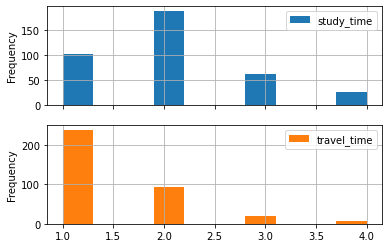

In [14]:
students[['study_time', 'travel_time']].plot(kind='hist',
                                             grid=True,
                                             subplots=True)

Согласно гистограммам - все признаки переменных находятся в допустимых диапазонах.

### 3. failures(5 показатель)
Распределение от 0 до 3

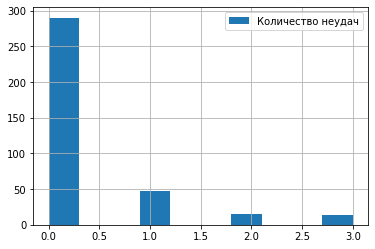

In [15]:
students.failures.hist(label='Количество неудач')
plt.legend()

Значения находятся в допустимых пределах.

### 4. fam_rel, free_time, go_out, health. (6,7,8,9 показатель)
Распределение от 1 до 5

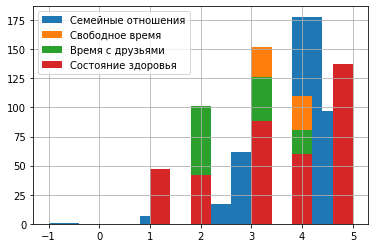

In [16]:
students.fam_rel.hist(label='Семейные отношения', bins=10)
students.free_time.hist(label='Свободное время', bins=10)
students.go_out.hist(label='Время с друзьями', bins=10)
students.health.hist(label='Состояние здоровья', bins=10)
plt.legend()

Показатель famrel имеет недопустимое значение, уберем его:

In [17]:
students.fam_rel = students.fam_rel.apply(lambda x: None if x < 0 else x)

### 5. absences (10)

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

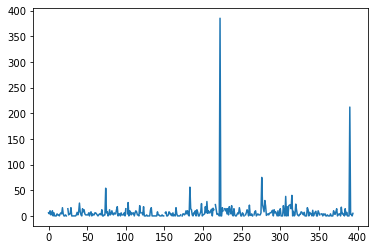

In [18]:
students.absences.plot()
students.absences.describe()

Согласно расчету границы выбросов у данного показателя составляют absences: 
Границы выбросов: [-12.0, 20.0]. Если отталкиваться от здравой логики, то количество пропущенных занятий не может быть < 0. Более того, учитывая, что нам не известно общее количество проведенных занятий по математике, не вижу смысла убирать все значения, которые выше 20. 
По графику видно, что 2 значения выбиваются особенно сильно 212 и 385. Можно сделать предположение, что ученики больше не учатся в данной школе или данные заполнены ошибочно. Так или иначе, эти значения "портят всю малину", уберем их:

In [19]:
students.absences = students.absences.apply(lambda x: None if x > 100 else x)

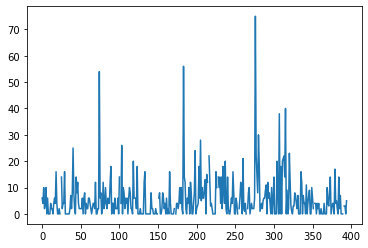

In [20]:
students.absences.plot()

### 6. score (11)

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

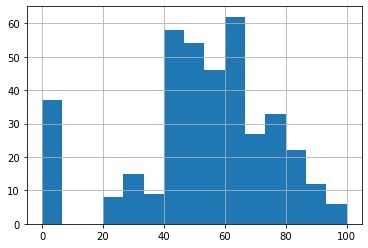

In [21]:
students.score.hist(bins=15)
students.score.describe()

По распределению видно:
1) Выбросов нет (значений, которые выходят за пределы 0 и 100). 
2) В среднем, все студенты сдали на 50 баллов
3) Есть порядка 40 студентов, которые получили 0 баллов. Вероятнее всего они не присутствовали на экзамене.

### 7. age (12)

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

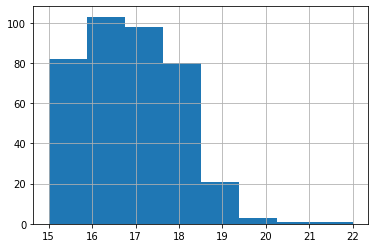

In [22]:
students.age.hist(bins=8)
students.age.describe()

Возраст в допустимых границах. Основная масса учеников приходится на возраст в диапазоне от 15 до 18 лет.

### 8. studytime, granular (13)

count    382.000000
mean      -6.109948
std        2.541716
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

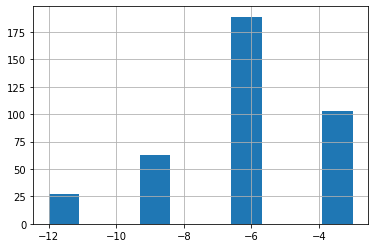

In [23]:
students['studytime, granular'].hist(bins=10)
students['studytime, granular'].describe()

Пока нет понимания, что это за показатель, и чем он отличается от обычного studytime.
Сравним 2 признака:

,"studytime, granular",study_time
"studytime, granular",1.0,-1.0
study_time,-1.0,1.0


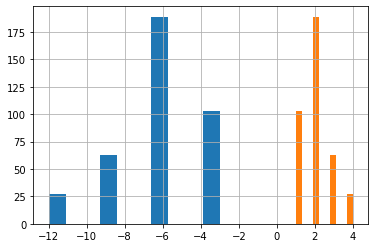

In [24]:
students['studytime, granular'].hist()
students['study_time'].hist()
students[['studytime, granular', 'study_time']].corr()

По графику и коэфф. корреляции видно, что распределение признаков полностью зеркальное. Следовательно, от 1 переменной можно избавиться.
Удалим столбец studytime, granular из нашего датасета

In [25]:
students.drop(['studytime, granular'], axis=1, inplace=True)
numeric_columns.remove('studytime, granular')

## Вариант 2. Разбор всех показателей сразу

Выводим распределение признаков сразу по всем числовым переменным.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245D0D5C910>,
      dtype=object)

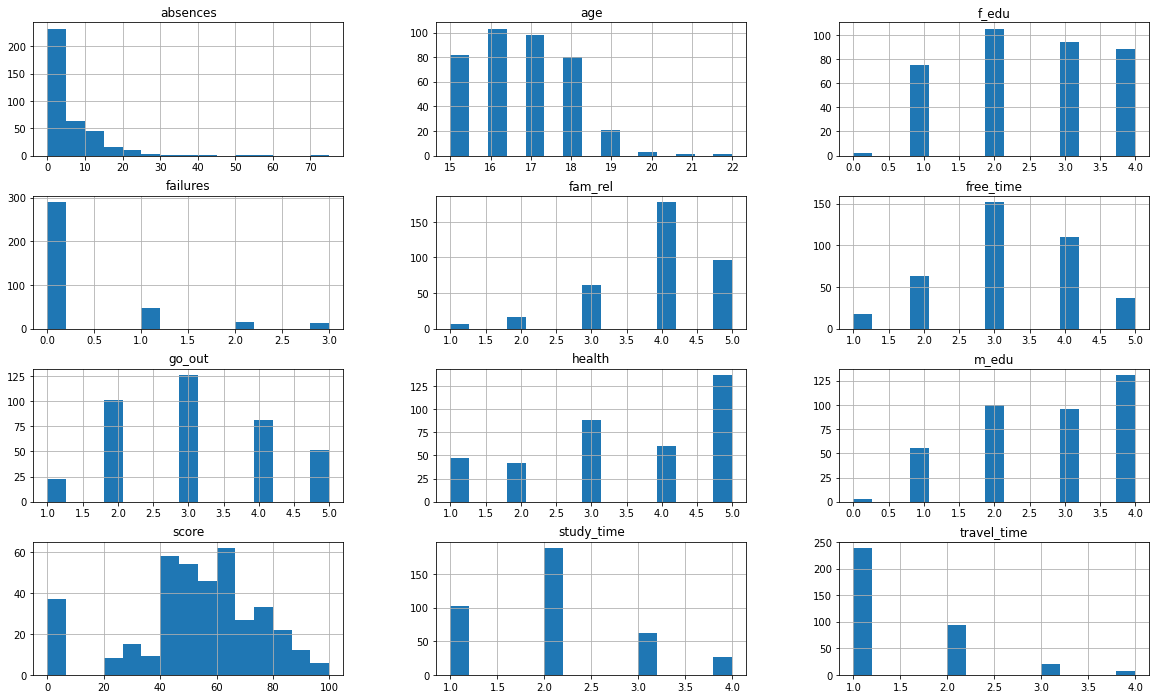

In [26]:
f = set(numeric_columns)

students[f].hist(figsize=(20, 12), bins=15)

Аналогичные выводы, что и в варианте 1

# 3. Оценка количества уникальных значений для номинативных переменных.

In [27]:
students[nominative_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      389 non-null    object
 1   sex         389 non-null    object
 2   address     374 non-null    object
 3   fam_size    362 non-null    object
 4   p_status    344 non-null    object
 5   m_job       370 non-null    object
 6   f_job       353 non-null    object
 7   reason      372 non-null    object
 8   guardian    358 non-null    object
 9   school_sup  380 non-null    object
 10  fam_sup     351 non-null    object
 11  paid        350 non-null    object
 12  activities  375 non-null    object
 13  nursery     374 non-null    object
 14  higher      369 non-null    object
 15  internet    355 non-null    object
 16  romantic    358 non-null    object
dtypes: object(17)
memory usage: 54.7+ KB


## Способ 1. 
Установив в Configurable nbextensions - table_beautifier в таблице ниже можно устанавливать фильтр. 
Тем самым, по каждому показателю можно видеть распределение уникальных значений.

In [28]:
students[nominative_columns].apply(lambda x: x.value_counts())

,school,sex,address,fam_size,p_status,m_job,f_job,reason,guardian,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic
A,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GP,344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GT3,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LE3,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M,NaN,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MS,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T,NaN,NaN,NaN,NaN,308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U,NaN,NaN,291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Способ 2(Традиционный). 
Вывести при помощи функции распределение уникальных значений по каждому столбцу

In [29]:
for x in nominative_columns:
    display(pd.DataFrame(students[x].value_counts()))

,school
GP,344
MS,45


,sex
F,204
M,185


,address
U,291
R,83


,fam_size
GT3,255
LE3,107


,p_status
T,308
A,36


,m_job
other,127
services,98
at_home,58
teacher,55
health,32


,f_job
other,194
services,99
teacher,29
at_home,16
health,15


,reason
course,135
reputation,102
home,101
other,34


,guardian
mother,248
father,86
other,24


,school_sup
no,331
yes,49


,fam_sup
yes,216
no,135


,paid
no,197
yes,153


,activities
yes,192
no,183


,nursery
yes,297
no,77


,higher
yes,350
no,19


,internet
yes,300
no,55


,romantic
no,235
yes,123


Значения во всех переменных заполнены корректно, без ошибок. 
Стоит отменить, что у 15ти из 17 переменных есть незаполненные значения

#  4. Преобразование данных

Не понял, что нужно преобразовывать (oT-T)尸

Присвоим пустым значениям в номинативных переменных значение "other_values", для более корректного дальнейшего анализа

In [30]:
for column in nominative_columns:
    students[column][students[column].isnull()] = 'other_values'

In [31]:
students[nominative_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      389 non-null    object
 1   sex         389 non-null    object
 2   address     389 non-null    object
 3   fam_size    389 non-null    object
 4   p_status    389 non-null    object
 5   m_job       389 non-null    object
 6   f_job       389 non-null    object
 7   reason      389 non-null    object
 8   guardian    389 non-null    object
 9   school_sup  389 non-null    object
 10  fam_sup     389 non-null    object
 11  paid        389 non-null    object
 12  activities  389 non-null    object
 13  nursery     389 non-null    object
 14  higher      389 non-null    object
 15  internet    389 non-null    object
 16  romantic    389 non-null    object
dtypes: object(17)
memory usage: 54.7+ KB


#  5. Корреляционный анализ количественных переменных

In [32]:
students.corr()

,age,m_edu,f_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,health,absences,score
age,1.000000,-0.146736,-0.147952,0.073146,-0.018227,0.205919,0.054846,0.016099,0.121115,-0.068103,0.171939,-0.155726
m_edu,-0.146736,1.000000,0.626536,-0.165838,0.081032,-0.240319,-0.010205,0.038265,0.072320,-0.048331,0.096016,0.213349
f_edu,-0.147952,0.626536,1.000000,-0.142170,0.013009,-0.272352,-0.026481,-0.012749,0.054938,0.017321,0.038860,0.130002
travel_time,0.073146,-0.165838,-0.142170,1.000000,-0.105910,0.049738,-0.039304,-0.026299,0.032629,-0.011724,-0.014284,-0.070559
study_time,-0.018227,0.081032,0.013009,-0.105910,1.000000,-0.181947,0.029253,-0.125066,-0.053831,-0.079180,-0.065809,0.115741
failures,0.205919,-0.240319,-0.272352,0.049738,-0.181947,1.000000,0.000506,0.091608,0.107747,0.088013,0.068090,-0.344338
fam_rel,0.054846,-0.010205,-0.026481,-0.039304,0.029253,0.000506,1.000000,0.162715,0.064314,0.100807,-0.041958,0.051219
free_time,0.016099,0.038265,-0.012749,-0.026299,-0.125066,0.091608,0.162715,1.000000,0.296338,0.064315,-0.068436,0.019026
go_out,0.121115,0.072320,0.054938,0.032629,-0.053831,0.107747,0.064314,0.296338,1.000000,-0.018026,0.038435,-0.129685
health,-0.068103,-0.048331,0.017321,-0.011724,-0.079180,0.088013,0.100807,0.064315,-0.018026,1.000000,-0.021277,-0.070460


Построим heapmap для наглядности:

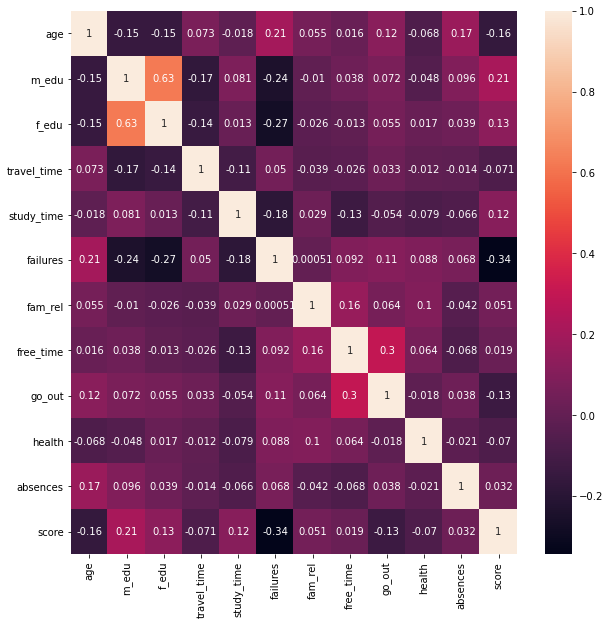

In [33]:
sns.heatmap(students.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)

Переменные m_edu и f_edu сильно скоррелированы между собой, соответственно по ним будут аналогичные выводы. Думаю, для последующего анализа достаточно будет 1 переменной. Пусть это будет m_edu.

# 6. Отбор некоррелирующих переменных

Все переменные в той или иной степени коррелируют с переменной score. Соответственно для последующего анализа нам понадобятся все переменные.

# 7. Анализ номинативных переменных

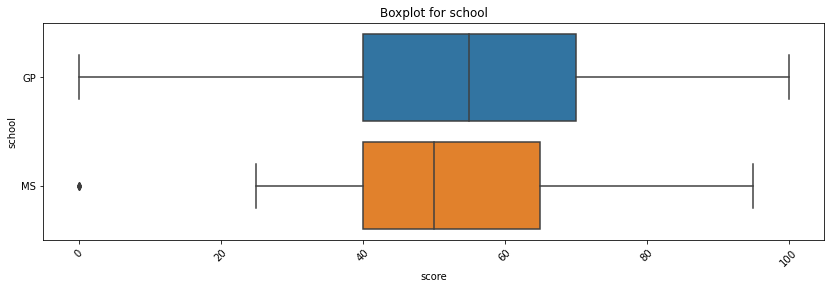

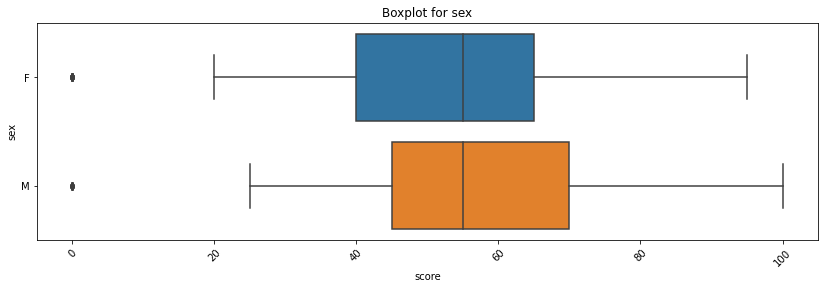

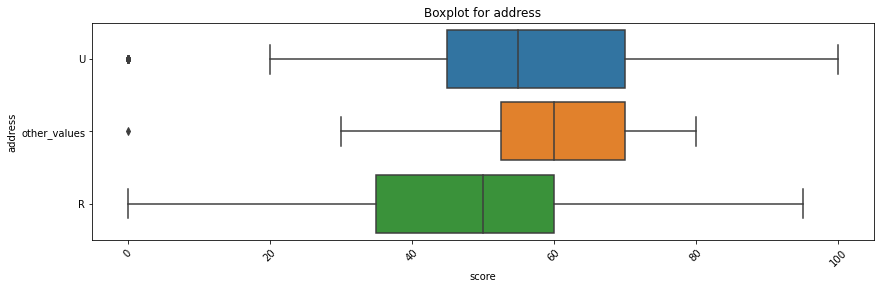

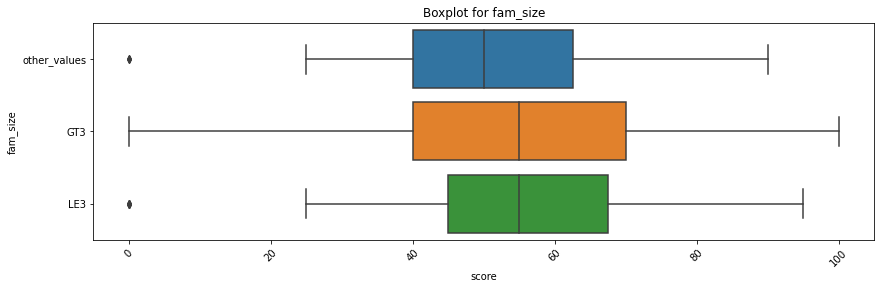

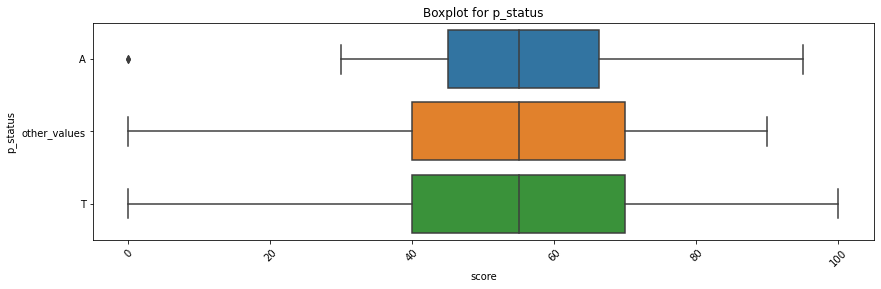

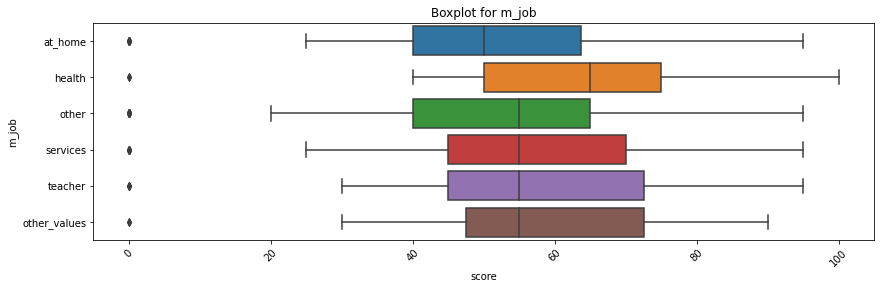

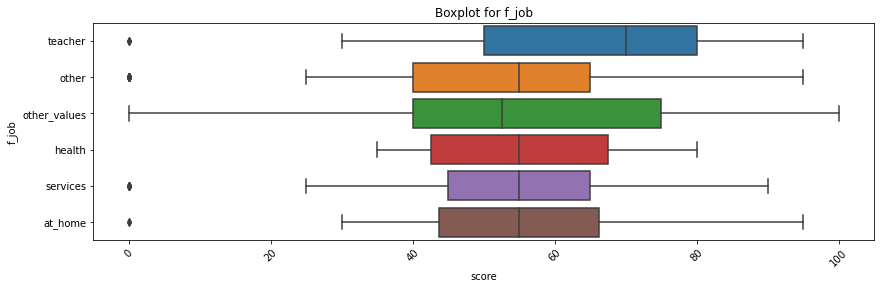

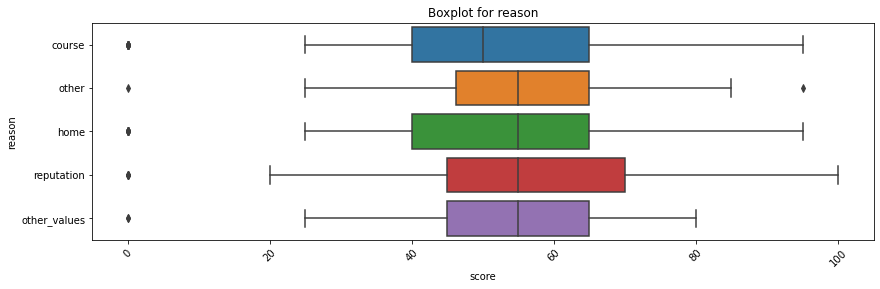

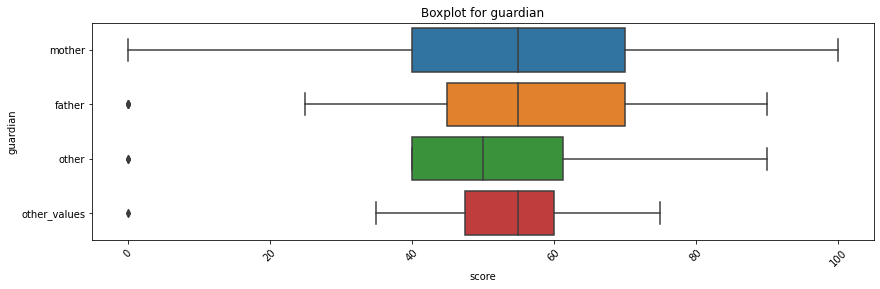

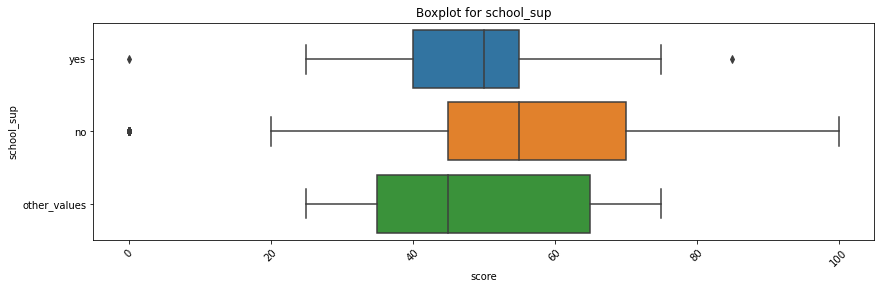

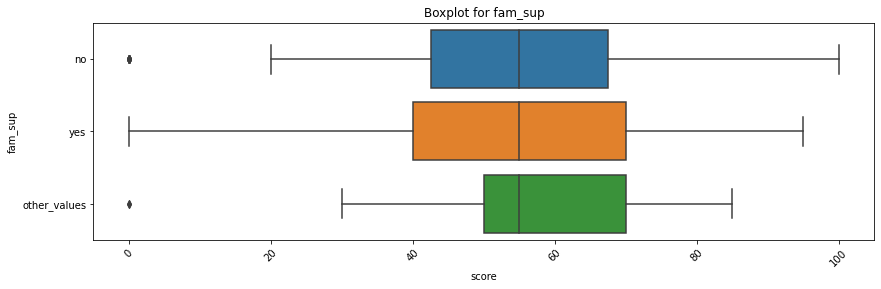

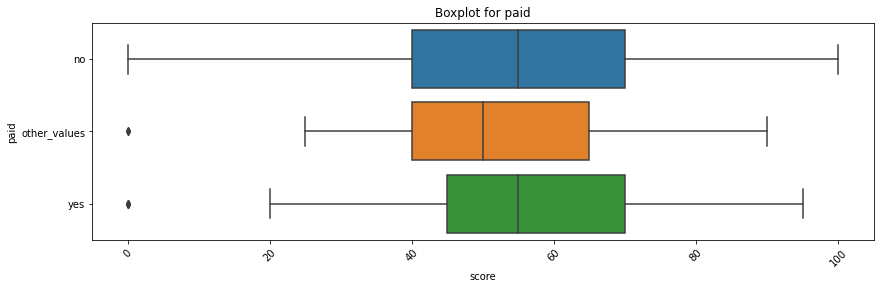

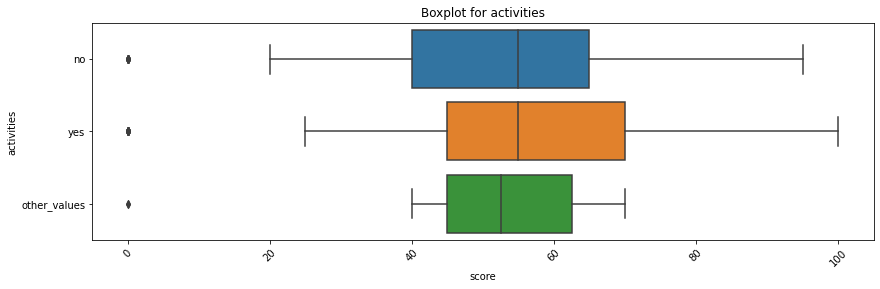

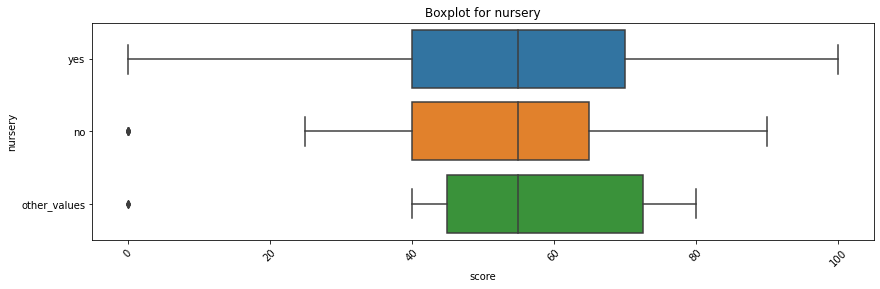

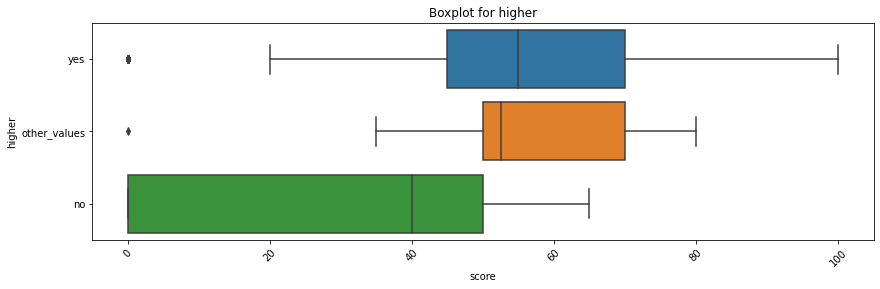

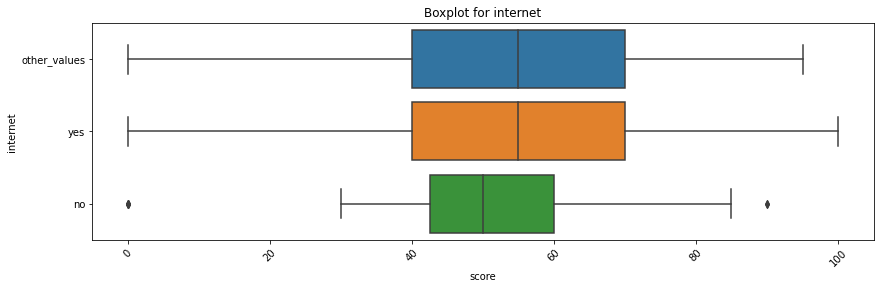

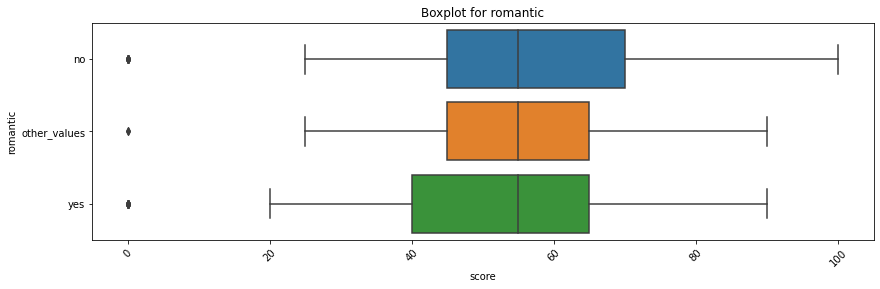

In [34]:
for i in nominative_columns:
    get_boxplot(i)

По графикам похоже, что все параметры, могут влиять на полученный результат(score). Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении баллов по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения полученных баллов по различным параметрам неразличимы:

In [35]:
for col in nominative_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются два параметра: higher и romantic. Оставим эти переменные в датасете для дальнейшего построения модели. 

# 8. Выводы

Итак, в результате EDA для анализа влияния параметров учащихся на полученные баллы по математике были получены следующие выводы:

    - В данных достаточно много пустых значений. 4 строки были исключены из анализа т.к. переменная score в них была не заполнена. Для корректного анализа также было присвоено значение "other_values" по номинативным переменным.
    - Выбросы найдены только в столбцах f_edu, fam_rel и absences, что позволяет сделать вывод о том, что данные достаточно чистые.
    Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: higher,  romantic, m_edu, travel_time, study_time, failures, fam_rel, free_time, go_out, health, absences, age.

In [36]:
important_columns = ['higher', 'romantic', 'm_edu', 'travel_time', 'study_time',
                     'failures', 'fam_rel', 'free_time', 'go_out', 'health', 'absences', 'age']
students_for_model = students.loc[:, important_columns]
students_for_model.head()

,higher,romantic,m_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,health,absences,age
0,yes,no,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,18
1,yes,no,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,17
2,yes,other_values,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,15
3,yes,yes,4.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,15
4,yes,no,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,16
